<a href="https://colab.research.google.com/github/Santt89/Proyecto_prediccion_temperaturas./blob/main/Proyecto_prediccion_temperaturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final**





# **Fundamentos de Ciencia de Datos**

----------------------------------------------------------------------------------------------------------------------------------------------------------------

Datos utilizados:

`informacion-meteorologica-2011.csv`

https://data.buenosaires.gob.ar/dataset/informacion-meteorologica/resource/juqdkmgo-1222-resource



`informacion-meteorologica-2012.csv`

https://data.buenosaires.gob.ar/dataset/informacion-meteorologica/resource/juqdkmgo-1223-resource


`torres-de-monitoreo-inteligente-tmi.csv`

https://data.buenosaires.gob.ar/dataset/informacion-meteorologica/resource/juqdkmgo-1224-resource


Los datasets `informacion-meteorologica-2011.csv` e `informacion-meteorologica-2012.csv` cuentan con las mismas columnas, solo que el primero es del año 2011 mientras que el otro del año 2012.

Por otro lado el dataset `torres-de-monitoreo-inteligente-tmi.csv` cuenta con la ubicación de las torres de monitoreo de las distintas estaciones.

En primer lugar, lo que haremos será trabajar un poco con los datos y luego concatenar horizontalmente los datasets `informacion-meteorologica-2011.csv` y`informacion-meteorologica-2012.csv`. Luego, analizaremos las relaciones que hay entre las temperaturas de las estaciones, y por ultimo, mediante los datos aportados por el dataset `torres-de-monitoreo-inteligente-tmi.csv` visualizaremos si la similitud entre las temperaturas de las estaciones tiene que ver con su ubicación o no.

# **Objetivos:** 🎯

*  Mediante los datasets `informacion-meteorologica-2011.csv` e `informacion-meteorologica-2012.csv` analizaremos las temperaturas registradas por cada estación y buscaremos relaciones entre ellas. Nuestro enfoque consistirá en identificar estaciones que presenten patrones de temperatura similares, para luego realizar una regresión lineal entre dichas estaciones. Esto nos permitirá calcular la temperatura de una estación en caso de que no pueda proporcionar su propio registro, utilizando la regresión lineal realizada.

  Adicionalmente, podremos utilizar el dataset `torres-de-monitoreo-inteligente-tmi.csv`, el cual nos brinda información sobre la ubicación de las torres de monitoreo de las estaciones. Esto nos permitirá verificar las distancias entre las estaciones y considerar este factor en nuestro análisis.  

  En conclusión, nuestro objetivo se basa en identificar la estación (o estaciones) más adecuada(s) para realizar la regresión lineal y calcular la temperatura faltante en caso de ausencia de datos. Este proceso de selección se basará en considerar tanto la ubicación geográfica como la similitud en los registros de temperatura entre las estaciones.


*   También, analizaramos las siguientes relaciones:
  *   `Temperatura media` y `porcentaje de humedad media`.
   *   `Temperatura media` y `velocidad media del viento`
   *  ` Porcentaje de humedad media` y `velocidad media del viento`.


Si alguna de estas relaciones se cumple, aplicaremos una regresión lineal y con la información que nos brinde la podremos utilizar para realizar predicciones o inferir patrones y tendencias.



# Comenzemos! 🚀

En primer lugar, importamos las librerias necesarias.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Cargamos el csv: `informacion-meteorologica-2011.csv`

Para cargarlo le especificamos a la función `read_csv` de la libreria Pandas el siguiente argumento:

*   Nombre del archivo a leer = `informacion-meteorologica-2011.csv`


In [ ]:
df_2011 = pd.read_csv('informacion-meteorologica-2011.csv')

In [ ]:
df_2011

,FECHA,HORA,ESTACION,VV_(M/S),DV,TEMP_C,HR_PORC,PRESS_MBAR,PLUV_MM,RAD_SOL_W/M2,UV_UVINDEX
0,01/04/2011,00:00,1298,0.4,90.0,14.1,80,1019.4,0,0,0.0
1,01/04/2011,01:00,1298,0.9,90.0,13.7,82,1018.9,0,0,0.0
2,01/04/2011,02:00,1298,0.9,90.0,13.7,83,1018.6,0,0,0.0
3,01/04/2011,03:00,1298,0.9,90.0,13.4,84,1018.9,0,0,0.0
4,01/04/2011,04:00,1298,0.4,90.0,13.3,85,1018.9,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
22140,31/12/2011,23:00,1305,0.9,202.5,24.7,72,1010.3,0,0,0.0
22141,31/12/2011,23:00,1309,3.1,112.5,23.8,73,1011.5,0,0,0.0
22142,31/12/2011,23:00,1310,2.2,112.5,24.4,73,1011.7,0,0,0.0
22143,31/12/2011,23:00,1314,0.4,90.0,24.8,73,1010.4,0,0,0.0


En base a nuestros objetivos, trabajaremos con las variables `TEMP_C` (temperatura) , `HR_PORC` (porcentaje de humedad) y `VV_(M/S)` (velocidad del viento en metros por segundo)



Lo que haremos en primer lugar, será quedarnos solamente con las variables numéricas mencionadas anteriormente, y luego agregar las siguiente columnas calculando su valor con los datos disponibles:


*   `TEMP_MAX`
*  ` TEMP_MIN`
*   `TEMP_MEDIA`
*  ` HR_MEDIA`
*   `VV_(M/S)`



Todo estas variables seran **diarias**.




Analizamos los tipos de datos de las variables.

In [ ]:
df_2011.dtypes

FECHA            object
HORA             object
ESTACION          int64
VV_(M/S)        float64
DV              float64
TEMP_C          float64
HR_PORC          object
PRESS_MBAR      float64
PLUV_MM           int64
RAD_SOL_W/M2      int64
UV_UVINDEX      float64
dtype: object

Parece extraño que la columna `HR_PORC ` sea de tipo `object`

Ya que sabemos que la columna nos indica el porcentaje de humedad, lo normal, es pensar que la variable debe ser numerica y estar en el rango [0,100]

Lo que haremos a continuación, será mediante una expresión regular de la libreria `re` buscar si hay registros que contengan caracteres.

En primer lugar, definimos un patrón para encontrar combinaciones de caracteres con numeros.

In [ ]:
patron = re.compile(r'\d+[a-zA-Z]')

Luego, aplicamos la expresión a la columna `HR_PORC` y filtramos de acuerdo a la expresión

In [ ]:
registros_con_patron = df_2011[df_2011['HR_PORC'].str.contains(patron)]

In [ ]:
registros_con_patron

,FECHA,HORA,ESTACION,VV_(M/S),DV,TEMP_C,HR_PORC,PRESS_MBAR,PLUV_MM,RAD_SOL_W/M2,UV_UVINDEX
10734,28/08/2011,09:00,1286,0.9,247.5,9.3,87.28/08/11rrr.0,1010.5,0,566,12.2


Podemos ver, que el valor de `HR_PORC` es un claro valor erroneo.

Para verificar si hay mas datos erroneos , lo que haremos a continuación, será fijarnos si hay valores en la columna `HR_PORC` que tengan mas de dos caracteres.

In [ ]:
filtro = df_2011['HR_PORC'].str.len() > 2

In [ ]:
df_2011[filtro].head()

,FECHA,HORA,ESTACION,VV_(M/S),DV,TEMP_C,HR_PORC,PRESS_MBAR,PLUV_MM,RAD_SOL_W/M2,UV_UVINDEX
4771,03/06/2011,12:00,1318,1.3,270.0,12.1,255,1020.1,0,21,0.0
5482,03/07/2011,20:00,1318,1.3,270.0,7.7,255,1022.6,0,0,0.0
5503,04/07/2011,03:00,1318,0.4,270.0,5.5,255,1022.1,0,0,0.0
5572,05/07/2011,02:00,1318,0.9,270.0,8.5,255,1017.1,0,0,0.0
7364,21/07/2011,10:00,1318,0.0,90.0,9.7,255,1021.0,0,19,0.0


Como podemos notar, la variable `HR_PORC ` recibe valores mayores a 100 y esto no deberia suceder.

Verificaremos que estaciones son las que nos brindan estos valores.

In [ ]:
df_2011[filtro]['ESTACION'].unique()

array([1318, 1286])

In [ ]:
len(df_2011[filtro])

435

Ya que contamos con muchos registros con valores erroneos, veremos cuantas estaciones tenemos en total en nuestro DF

In [ ]:
len(df_2011['ESTACION'].unique())

17

Ya que tenemos 17 estaciones, en nuestro análisis no afectará si eliminamos 2 estaciones.

In [ ]:
estaciones_a_eliminar = df_2011[filtro]['ESTACION'].unique()

In [ ]:
df_2011 = df_2011[~df_2011['ESTACION'].isin(estaciones_a_eliminar)]

Pasaremos la columna `FECHA` a formato `datetime` y la columna `HR_PORC` a `float`

In [ ]:
df_2011['FECHA'] = pd.to_datetime(df_2011['FECHA'], format='%d/%m/%Y')

df_2011['HR_PORC'] = df_2011['HR_PORC'].astype(float)

<ipython-input-15-c33c9c4722fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['FECHA'] = pd.to_datetime(df_2011['FECHA'], format='%d/%m/%Y')
<ipython-input-15-c33c9c4722fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['HR_PORC'] = df_2011['HR_PORC'].astype(float)


Como analizaremos las variables temperatura (`TEMP_C`), porcentaje de humedad (`HR_PORC`) y velocidad del viento (`VV_(M/S)`) lo que haremos en primer lugar será agrupar las mismas por `FECHA` y `ESTACION`.

Utilizaremos la función `groupby` y solo nos quedaremos con los campos `max` , `min` y `mean` de la temperatura y `mean`del porcentaje de humedad y  de la velocidad del viento.

In [ ]:
df_2011 = df_2011.groupby(['FECHA', 'ESTACION']).agg({'TEMP_C': ['max', 'min', 'mean'] , 'HR_PORC' : 'mean' ,'VV_(M/S)' : 'mean' })

In [ ]:
df_2011.head()

TEMP_C                     HR_PORC  VV_(M/S)
                       max   min       mean       mean      mean
FECHA      ESTACION                                             
2011-04-01 1292       28.8  20.7  23.485714  72.571429  0.114286
           1298       15.7  13.3  14.553846  84.615385  2.092308
2011-04-02 1292       25.7  18.0  21.645833  78.333333  0.016667
           1298       18.6  14.3  16.029412  84.117647  1.882353
2011-04-03 1292       26.3  17.9  21.720833  76.708333  0.162500

Como se nos estableció como indice `FECHA` y `ESTACION`, lo reseteremos para que vuelvan a ser nombres de columnas y cambiamos los nombres de algunas columnas.

In [ ]:
df_2011 = df_2011.reset_index()
df_2011.columns = ['FECHA', 'ESTACION', 'TEMP_MAX', 'TEMP_MIN', 'TEMP_MEDIA' , 'POR_HUM_MEDIA' , 'VV_MEDIA']

In [ ]:
df_2011

,FECHA,ESTACION,TEMP_MAX,TEMP_MIN,TEMP_MEDIA,POR_HUM_MEDIA,VV_MEDIA
0,2011-04-01,1292,28.8,20.7,23.485714,72.571429,0.114286
1,2011-04-01,1298,15.7,13.3,14.553846,84.615385,2.092308
2,2011-04-02,1292,25.7,18.0,21.645833,78.333333,0.016667
3,2011-04-02,1298,18.6,14.3,16.029412,84.117647,1.882353
4,2011-04-03,1292,26.3,17.9,21.720833,76.708333,0.162500
...,...,...,...,...,...,...,...
760,2011-12-31,1296,28.4,22.2,24.987500,66.291667,0.291667
761,2011-12-31,1305,27.4,22.3,24.745833,68.875000,0.833333
762,2011-12-31,1309,26.8,21.4,24.033333,67.875000,2.766667
763,2011-12-31,1310,27.2,21.6,24.104167,70.791667,1.737500


Antes de explorar nuestras variables, a continuación, haremos lo mismo para el dataset `informacion-meteorologica-2012.csv`. Asi luego, podemos concatenar ambos DF y tener las temperaturas, el porcentaje de humedad y la velocidad del viento de los años 2011 y 2012 todos en un mismo DF.

Cargamos el csv: `informacion-meteorologica-2012.csv`

Para cargarlo le especificamos a la función `read_csv` de la libreria Pandas el siguiente argumento:

*   Nombre del archivo a leer = `informacion-meteorologica-2012.csv`

In [ ]:
df_2012 = pd.read_csv('informacion-meteorologica-2012.csv')

In [ ]:
df_2012

,FECHA,HORA,ESTACION,VV_(M/S),DV,TEMP_C,HR_PORC,PRESS_MBAR,PLUV_MM,RAD_SOL_W/M2,UV_UVINDEX
0,01/01/2012,00:00,1283,0.4,67.5,24.6,65,1010.8,0,0,0.0
1,01/01/2012,00:00,1284,2.7,135.0,24.8,60,1011.6,0,0,0.0
2,01/01/2012,00:00,1286,0.0,112.5,24.8,60,1012.6,0,0,0.0
3,01/01/2012,00:00,1291,0.0,180.0,24.6,59,1011.5,0,0,0.0
4,01/01/2012,00:00,1296,0.4,45.0,24.9,57,1010.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29554,17/07/2012,10:00,1286,0.4,270.0,8.5,62,1028.9,0,13,0.0
29555,17/07/2012,10:00,1315,0.4,45.0,8.3,68,1027.7,0,21,0.0
29556,17/07/2012,11:00,1286,0.4,270.0,9.2,59,1029.1,0,26,0.4
29557,17/07/2012,12:00,1286,0.0,157.5,11.5,56,1027.4,0,278,2.3


Analizamos los tipos de datos de las variables.

In [ ]:
df_2012.dtypes

FECHA            object
HORA             object
ESTACION          int64
VV_(M/S)        float64
DV              float64
TEMP_C          float64
HR_PORC           int64
PRESS_MBAR      float64
PLUV_MM           int64
RAD_SOL_W/M2      int64
UV_UVINDEX      float64
dtype: object

Podemos notar que en este caso `HR_PORC` no esta en `object` como en el dataset anterior. Igualmente verificaremos que no tenga valores erroneos.

In [ ]:
filtro = df_2012['HR_PORC'] > 100

In [ ]:
df_2012[filtro]

,FECHA,HORA,ESTACION,VV_(M/S),DV,TEMP_C,HR_PORC,PRESS_MBAR,PLUV_MM,RAD_SOL_W/M2,UV_UVINDEX
49,01/01/2012,04:00,1318,0.4,90.0,21.7,255,1012.1,0,0,0.0
59,01/01/2012,05:00,1318,0.4,90.0,1802.6,255,1012.8,0,0,0.0
69,01/01/2012,06:00,1318,0.4,67.5,20.9,255,1013.6,0,0,0.0
109,01/01/2012,10:00,1318,1.8,67.5,22.1,255,1014.8,0,629,11.9
260,02/01/2012,00:00,1318,0.9,67.5,23.9,255,1011.8,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28998,05/07/2012,20:00,1286,0.9,270.0,9.6,255,1017.7,0,0,0.0
29002,05/07/2012,22:00,1286,0.4,270.0,9.4,255,1018.8,0,0,0.0
29048,06/07/2012,21:00,1286,0.0,90.0,10.2,255,1023.2,0,0,0.0
29408,14/07/2012,09:00,1286,1.8,270.0,4.7,255,1024.6,0,8,0.0


Igual que en el caso anterior, la variable `HR_PORC ` recibe valores mayores a 100 y esto no deberia suceder.

Lo resolveremos de igual manera que antes, eliminando las estaciones que aportan dichos valores.

Verificamos si son exactamente las mismas estaciones las que nos brindan valores erroneos.

In [ ]:
estaciones_a_eliminar = df_2012[filtro]['ESTACION'].unique()

In [ ]:
estaciones_a_eliminar

array([1318, 1309, 1286])

Además de las estaciones que coinciden con las del dataset anterior, tambien se agrega la estación `1309` que tambien la eliminaremos.

In [ ]:
estaciones_a_eliminar = df_2012[filtro]['ESTACION'].unique()

In [ ]:
df_2012 = df_2012[~df_2012['ESTACION'].isin(estaciones_a_eliminar)]

Pasaremos la columna fecha a formato `datetime`

In [ ]:
df_2012['FECHA'] = pd.to_datetime(df_2012['FECHA'], format='%d/%m/%Y')

<ipython-input-29-e66c398f6d84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['FECHA'] = pd.to_datetime(df_2012['FECHA'], format='%d/%m/%Y')


Como analizaremos las variables temperatura (`TEMP_C`), porcentaje de humedad (`HR_PORC`) y velocidad del viento (`VV_(M/S)`) lo que haremos en primer lugar será agrupar las mismas por `FECHA` y `ESTACION`.

Utilizaremos la función `groupby` y solo nos quedaremos con los campos `max` , `min` y `mean` de la temperatura, `mean`del porcentaje de humedad y `mean` de la velocidad del viento.

In [ ]:
df_2012 = df_2012.groupby(['FECHA', 'ESTACION']).agg({'TEMP_C': ['max', 'min', 'mean'] , 'HR_PORC' : 'mean' , 'VV_(M/S)' : 'mean'})

In [ ]:
df_2012

TEMP_C                     HR_PORC  VV_(M/S)
                       max   min       mean       mean      mean
FECHA      ESTACION                                             
2012-01-01 1283       31.4  20.8  25.191667  55.291667  0.216667
           1284       29.5  21.0  24.854167  57.458333  2.083333
           1291       28.7  21.1  24.891667  63.125000  0.000000
           1296       30.9  21.2  25.258333  57.666667  0.283333
           1305       28.6  21.4  24.712500  63.916667  0.587500
...                    ...   ...        ...        ...       ...
2012-07-13 1315       16.3   9.6  12.562500  55.541667  0.641667
2012-07-14 1315       11.4   5.1   8.691667  62.583333  1.520833
2012-07-15 1315        8.7   4.7   7.050000  66.958333  0.400000
2012-07-16 1315        9.9   6.5   8.104167  69.125000  0.333333
2012-07-17 1315        8.9   7.3   7.963636  69.363636  0.036364

[990 rows x 5 columns]

Como se nos estableció como indice `FECHA` y `ESTACION`, lo reseteremos para que vuelvan a ser nombres de columnas. Además, modificamos los nombres de las columnas.

In [ ]:
df_2012 = df_2012.reset_index()
df_2012.columns = ['FECHA', 'ESTACION', 'TEMP_MAX', 'TEMP_MIN', 'TEMP_MEDIA', 'POR_HUM_MEDIA' , 'VV_MEDIA']

In [ ]:
df_2012

,FECHA,ESTACION,TEMP_MAX,TEMP_MIN,TEMP_MEDIA,POR_HUM_MEDIA,VV_MEDIA
0,2012-01-01,1283,31.4,20.8,25.191667,55.291667,0.216667
1,2012-01-01,1284,29.5,21.0,24.854167,57.458333,2.083333
2,2012-01-01,1291,28.7,21.1,24.891667,63.125000,0.000000
3,2012-01-01,1296,30.9,21.2,25.258333,57.666667,0.283333
4,2012-01-01,1305,28.6,21.4,24.712500,63.916667,0.587500
...,...,...,...,...,...,...,...
985,2012-07-13,1315,16.3,9.6,12.562500,55.541667,0.641667
986,2012-07-14,1315,11.4,5.1,8.691667,62.583333,1.520833
987,2012-07-15,1315,8.7,4.7,7.050000,66.958333,0.400000
988,2012-07-16,1315,9.9,6.5,8.104167,69.125000,0.333333


Una vez hecho esto, concatenaremos horizontalmente los dos DF para que nos queden los datos unificados en un mismo DF.

Para hacer esto utilizaremos la función `concat` de `pandas`.

In [ ]:
df = pd.concat([df_2011, df_2012], ignore_index=True)

In [ ]:
df

,FECHA,ESTACION,TEMP_MAX,TEMP_MIN,TEMP_MEDIA,POR_HUM_MEDIA,VV_MEDIA
0,2011-04-01,1292,28.8,20.7,23.485714,72.571429,0.114286
1,2011-04-01,1298,15.7,13.3,14.553846,84.615385,2.092308
2,2011-04-02,1292,25.7,18.0,21.645833,78.333333,0.016667
3,2011-04-02,1298,18.6,14.3,16.029412,84.117647,1.882353
4,2011-04-03,1292,26.3,17.9,21.720833,76.708333,0.162500
...,...,...,...,...,...,...,...
1750,2012-07-13,1315,16.3,9.6,12.562500,55.541667,0.641667
1751,2012-07-14,1315,11.4,5.1,8.691667,62.583333,1.520833
1752,2012-07-15,1315,8.7,4.7,7.050000,66.958333,0.400000
1753,2012-07-16,1315,9.9,6.5,8.104167,69.125000,0.333333


Una vez realizado todo esto, comenzaremos con el análisis de los datos.

Como podemos observar tenemos datos desde `2011-04-01` hasta el `2012-07-17.`

Comenzaremos observando los tipos de datos que tienen nuestras variables.

In [ ]:
df.dtypes

FECHA            datetime64[ns]
ESTACION                  int64
TEMP_MAX                float64
TEMP_MIN                float64
TEMP_MEDIA              float64
POR_HUM_MEDIA           float64
VV_MEDIA                float64
dtype: object

Ahora, veremos si nuestro DF cuenta con valores nulos.

In [ ]:
df.isna().sum()

FECHA            0
ESTACION         0
TEMP_MAX         0
TEMP_MIN         0
TEMP_MEDIA       0
POR_HUM_MEDIA    0
VV_MEDIA         0
dtype: int64

Como podemos observar no contamos con valores nulos.

Visualizamos algunas medidas de resumen

In [ ]:
df.describe()

,ESTACION,TEMP_MAX,TEMP_MIN,TEMP_MEDIA,POR_HUM_MEDIA,VV_MEDIA
count,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000
mean,1299.445014,23.128205,16.258405,19.570334,65.911667,0.709982
std,12.208691,6.378175,5.459467,5.717163,10.833318,0.715196
min,1280.000000,6.200000,1.100000,4.170000,39.700000,0.000000
25%,1289.000000,18.100000,12.250000,15.231250,57.841667,0.150000
50%,1296.000000,23.700000,16.800000,20.260000,65.541667,0.541667
75%,1310.000000,27.700000,20.300000,23.841667,73.548611,1.045139
max,1316.000000,38.400000,36.700000,36.800000,95.041667,5.631250


Por lo que podemos notar, no contamos con valores atípicos y todas las medidas tienen sentido.

Lo que haremos a continuación, sera visualizar las variables para ver su distribución.

Visualizamos la variable `TEMP_MAX`. Lo haremos a través de un boxplot.

Usaremos la libreria `matplotlib.pyplot`

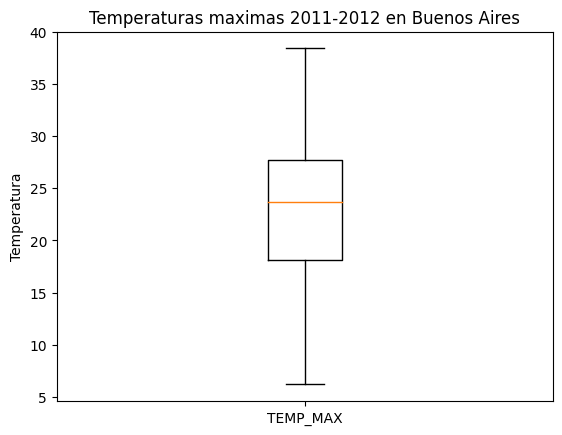

In [ ]:
plt.boxplot(df['TEMP_MAX'])
plt.xticks([1], ['TEMP_MAX'])
plt.ylabel('Temperatura')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Temperaturas maximas 2011-2012 en Buenos Aires')

plt.show()

Aclaración: cuando nos referimos a temperatura, nos estamos refieriendo a la temperatura de la variable en cuestión, que son las temperaturas maximas.

Mediante este gráfico de caja y bigotes, podemos observar bastantes datos interesantes de las temperaturas maximas, algunos de ellos son:

*   La temperatura **mínima** está levemente por encima de 5 grados.
*   La temperatura **máxima** es levemente menor a 40 grados.
*   **El 25%** de las temperaturas son menores a aproximadamente 18 grados.
*   **El 75%** de las temperaturas son menor a aproximadamente 27 grados.



Visualizamos la variable `TEMP_MIN`. Lo haremos a través de un gráfico de violin.

Usaremos la libreria `matplotlib.pyplot`

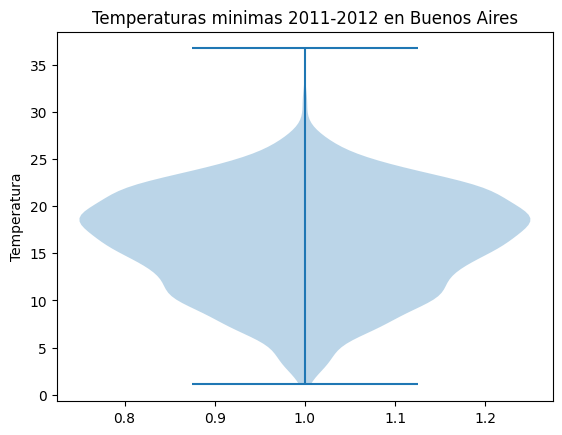

In [ ]:
plt.violinplot(df['TEMP_MIN'])
plt.title('Temperaturas minimas 2011-2012 en Buenos Aires')
plt.ylabel('Temperatura')
plt.show()

plt.show()

Aclaración: cuando nos referimos a temperatura, nos estamos refieriendo a la temperatura de la variable en cuestion, que son las temperaturas minimas.

Mediante este grafico de violin, podemos observar bastantes datos interesantes de la población, algunos de ellos son:

*   La temperatura mínima está levemente por encima de 0 grados.
*   la temperatura máxima está levemente por enciuma de los 35 grados.
*   La mayoria de temperaturas se encuentran entre los 10 y 20 grados.

Visualizamos la variable `TEMP_MEDIA`. Lo haremos a través de un gráfico de serie de tiempo.

Usaremos la libreria `matplotlib.pyplot`

Text(0.5, 1.0, 'Temperatura media por fecha')

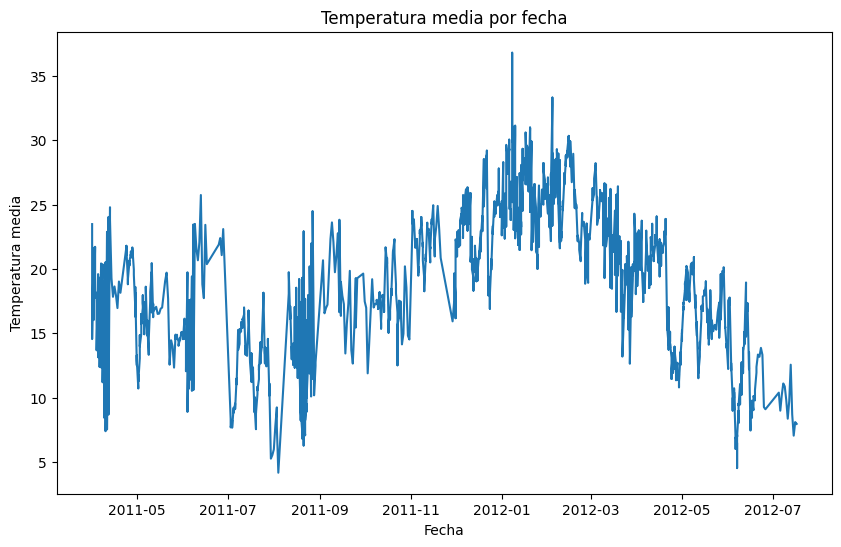

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['FECHA'], df['TEMP_MEDIA'])
plt.xlabel('Fecha')
plt.ylabel('Temperatura media')
plt.title('Temperatura media por fecha')


Aclaración: cuando nos referimos a temperatura, nos estamos refieriendo a la temperatura de la variable en cuestion, que son las temperaturas medias.

Con este grafico de series de tiempo, podemos notar como varia la temperatura media a lo largo de los meses.
Podemos notar varios datos interesantes:


* Entre las fechas 2011-07 y 2011-09 tenemos el mínimo de temperatura, esto tiene sentido, ya que estamos en epoca de frio en Argentina.
*   Podemos observar un notorio crecimiento de la temperatura media entre las fechas 2011-11 y 2012-03. Claramente esto se debe, a que en ese periodo de tiempo estamos en epoca de calor en Argentina.
*  En aproximadamente la fecha 2012-06 se ve un mínimo similiar al que vimos entre 2011-07 y 2011-09.




Visualizamos la variable `TEMP_MEDIA`. Lo haremos a través de un gráfico de serie de tiempo.

Usaremos la libreria `matplotlib.pyplot`

Text(0.5, 1.0, 'Humedad media por fecha')

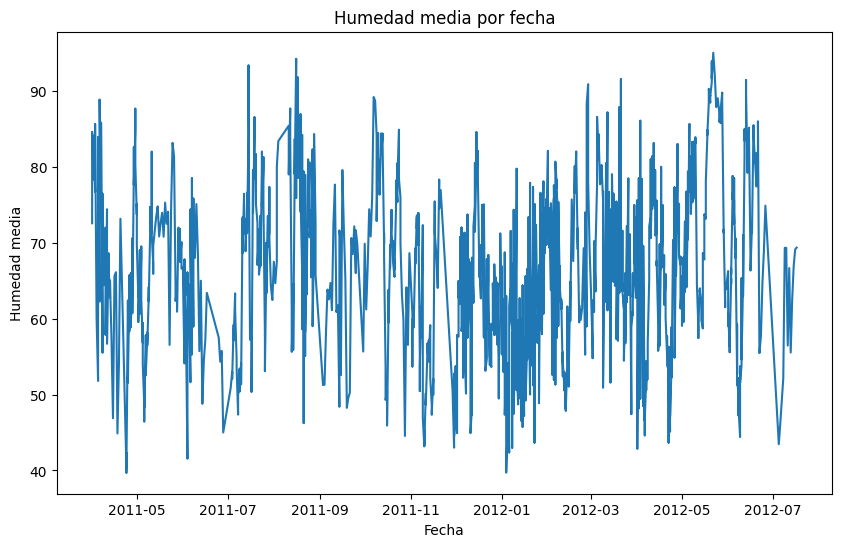

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['FECHA'], df['POR_HUM_MEDIA'])
plt.xlabel('Fecha')
plt.ylabel('Humedad media')
plt.title('Humedad media por fecha')

Aclaración: cuando nos referimos a la humedad, nos estamos refieriendo a la humedad de la variable en cuestion, que es el porcentaje de humedad media.

Con este grafico de series de tiempo, podemos notar como varia la humedad media a lo largo de los meses.
Si bien no hay un cierto patrón claro en la humedad, podemos notar una leve tendencia la cual es que los picos de humedad son menores en los meses de calor, es decir, entre 2011-09 y 2012-03 aproximadamente.

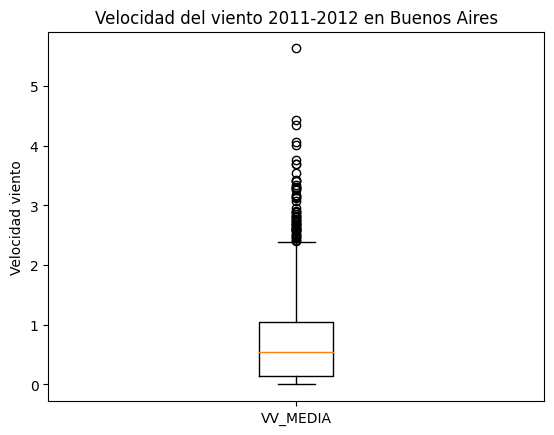

In [ ]:
plt.boxplot(df['VV_MEDIA'])
plt.xticks([1], ['VV_MEDIA'])
plt.ylabel('Velocidad viento')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Velocidad del viento 2011-2012 en Buenos Aires')

plt.show()

Aclaración: cuando nos referimos a velocidad del viento (VV), nos estamos refieriendo a la velocidad del viento de la variable en cuestion, que es la velocidad media del viento en metros por segundo.

Mediante este grafico de caja y bigotes, podemos observar bastantes datos interesantes de las temperaturas maximas, algunos de ellos son:

*   La VV **mínima** está levemente por encima de 0 metros por segundo.
*   La VV **máxima** está por encima de los 5 metros por segundo (valor atípico)
*   **El 25%** de VV son menores a aproximadamente 0.3 metros por segundo.
*   **El 75%** de VV son menor a 1 metro por segundo.


Podemos notar que contamos con varios valores atípicos, estos valores no son valores erroneos ya que los vientos en la ciudad de Buenos Aires no suelen ser altos, pero en los casos de tormentas u otros casos particulares aumentan notablemente.

Una vez analizado y visualizado como se distribuye cada una de las variables, comenzaremos a trabajar con las estaciones, para ver las relaciones que hay entre las temperaturas de las mismas.

Lo que haremos será seleccionar aquellas estaciones que cuenten con mayor número de registros para que nuestro análisis sea mas preciso.

Agruparemos las variables por estación mediante la función `groupby` y luego aplicaremos un `count` para contar los registros.

In [ ]:
estaciones_cant = df.groupby(['ESTACION']).count()

In [ ]:
estaciones_cant

,FECHA,TEMP_MAX,TEMP_MIN,TEMP_MEDIA,POR_HUM_MEDIA,VV_MEDIA
ESTACION,,,,,,
1280,52,52,52,52,52,52
1283,159,159,159,159,159,159
1284,142,142,142,142,142,142
1289,182,182,182,182,182,182
1291,150,150,150,150,150,150
1292,13,13,13,13,13,13
1295,44,44,44,44,44,44
1296,148,148,148,148,148,148
1298,28,28,28,28,28,28


Nos quedaremos con las estaciones que cuenten con mas de **60 registros.**

Aplicamos la función `filter` y luego hacemos una función `lambda` que filtrará solo las estaciones que tengan mas de 60 registros.

In [ ]:
df = df.groupby('ESTACION').filter(lambda x: len(x) > 60)

Chequeamos que se hayan filtrado las estaciones correctas.

In [ ]:
 df.groupby(['ESTACION']).count()

,FECHA,TEMP_MAX,TEMP_MIN,TEMP_MEDIA,POR_HUM_MEDIA,VV_MEDIA
ESTACION,,,,,,
1283,159,159,159,159,159,159
1284,142,142,142,142,142,142
1289,182,182,182,182,182,182
1291,150,150,150,150,150,150
1296,148,148,148,148,148,148
1305,151,151,151,151,151,151
1310,178,178,178,178,178,178
1314,91,91,91,91,91,91
1315,154,154,154,154,154,154


Una vez hecho esto, lo que haremos a continuación será crear un nuevo DF que tenga como indice la fecha y como cabecera de las columnas el nombre de las estaciones. Las columnas tendrán como dato las `TEMP_MEDIA` correspondientes a cada `FECHA` y `ESTACION`

Esto lo haremos para que podamos analizar la covarianza y la correlación de las temperaturas medias de cada estación.

In [ ]:
df_estacion = pd.pivot_table(df, values='TEMP_MEDIA', index='FECHA', columns='ESTACION')

#Eliminamos los nombres de las columnas y restablecemos los indices
df_estacion.columns.name = None
df_estacion.reset_index(inplace=True)

A continuación, hacemos la matriz de covarianza para ver como se relacionan dichas temperaturas.


In [ ]:
df_est_cov = df_estacion.cov()

<ipython-input-49-5331c06c9e33>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_est_cov = df_estacion.cov()


In [ ]:
df_est_cov

,1283,1284,1289,1291,1296,1305,1310,1314,1315,1316
1283,40.487916,23.228406,25.031174,19.439618,34.262870,36.267146,31.543815,20.103243,19.128558,26.952152
1284,23.228406,23.974518,18.548948,11.992860,19.024121,23.362635,18.859975,14.024255,14.427093,9.751762
1289,25.031174,18.548948,27.823762,30.990599,36.329536,32.969955,27.996426,19.293331,15.363257,16.946502
1291,19.439618,11.992860,30.990599,27.102837,33.784774,32.379038,29.260511,9.582225,21.658608,14.389312
1296,34.262870,19.024121,36.329536,33.784774,37.276390,36.754294,34.878021,18.338779,19.726190,28.164702
1305,36.267146,23.362635,32.969955,32.379038,36.754294,32.553362,33.918145,18.335270,17.993283,29.034662
1310,31.543815,18.859975,27.996426,29.260511,34.878021,33.918145,29.913301,10.312209,20.822956,15.996562
1314,20.103243,14.024255,19.293331,9.582225,18.338779,18.335270,10.312209,16.047265,11.175308,12.873510
1315,19.128558,14.427093,15.363257,21.658608,19.726190,17.993283,20.822956,11.175308,24.058910,17.159363
1316,26.952152,9.751762,16.946502,14.389312,28.164702,29.034662,15.996562,12.873510,17.159363,29.569477


Observando la matriz, podemos notar que todas las temperaturas medias , en cierto grado, estan relacionadas.

Hacemos la matriz de correlación

In [ ]:
df_est_corr = df_estacion.corr()

<ipython-input-51-cf5288067703>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_est_corr = df_estacion.corr()


In [ ]:
df_est_corr

,1283,1284,1289,1291,1296,1305,1310,1314,1315,1316
1283,1.000000,0.992830,0.926946,0.986985,0.993284,0.993562,0.991269,0.988580,0.988816,0.887961
1284,0.992830,1.000000,0.980981,0.971540,0.975975,0.979738,0.976811,0.966731,0.939170,0.627999
1289,0.926946,0.980981,1.000000,0.992540,0.992866,0.988919,0.931604,0.985836,0.812923,0.806913
1291,0.986985,0.971540,0.992540,1.000000,0.993877,0.991356,0.989062,0.969039,0.991081,0.738799
1296,0.993284,0.975975,0.992866,0.993877,1.000000,0.993566,0.988516,0.975183,0.982637,0.871745
1305,0.993562,0.979738,0.988919,0.991356,0.993566,1.000000,0.996452,0.974299,0.987418,0.859486
1310,0.991269,0.976811,0.931604,0.989062,0.988516,0.996452,1.000000,0.971783,0.993799,0.753425
1314,0.988580,0.966731,0.985836,0.969039,0.975183,0.974299,0.971783,1.000000,0.979542,0.739985
1315,0.988816,0.939170,0.812923,0.991081,0.982637,0.987418,0.993799,0.979542,1.000000,0.998786
1316,0.887961,0.627999,0.806913,0.738799,0.871745,0.859486,0.753425,0.739985,0.998786,1.000000


Observando la matriz podemos notar mas detalladamente la intensidad de las relaciones. Todas de alguna manera estan correlacionadas por las otras, pero algunas con mayor intensidad.

Hacemos el gráfico para facilitar la visualizacion de la matriz de correlación.


Utilizamos la libreria `seaborn`

<Axes: >

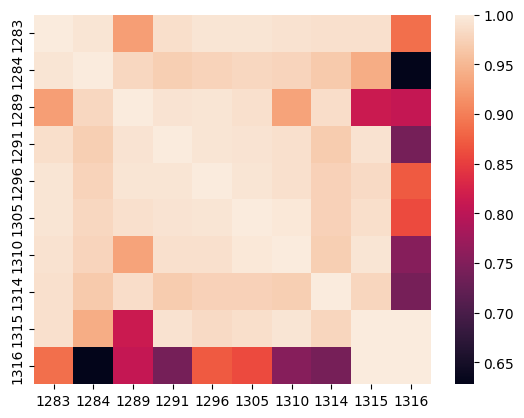

In [ ]:
sns.heatmap(df_est_corr, annot=False)

A continuación, lo que haremos será seleccionar las estaciones que presentan mayor correlación según lo visto anteriormente.

Visualizando el gráfico y viendo los distintos niveles de correlación que tienen las temperaturas medias de cada estación, agruparemos las estaciones segun la relación que tengan sus temperaturas.

Por un lado, podemos notar que las estaciones `1283-1284-1289-1291-1296-1305-1310-1314` tienen una correlación muy alta.

Mientras que por otro lado, podemos notar que las estaciones `1315 y 1316` tienen correlación baja con el resto de las estaciones pero muy alta entre ellas.











Lo que haremos a continuación será graficar las relaciones que hay entre las mismas en graficos de dispersión.


En primer lugar, graficaremos las relaciones entre las estaciones `1283-1284-1289-1291-1296-1305-1310-1314`

Como son demasiados los graficos, lo que haremos será seleccionar las estaciones mencionadas y utilizar la función `pairplot` de la libreria `seaborn`que nos hace gráficos de dispersión a partir de un df que le pasemos.

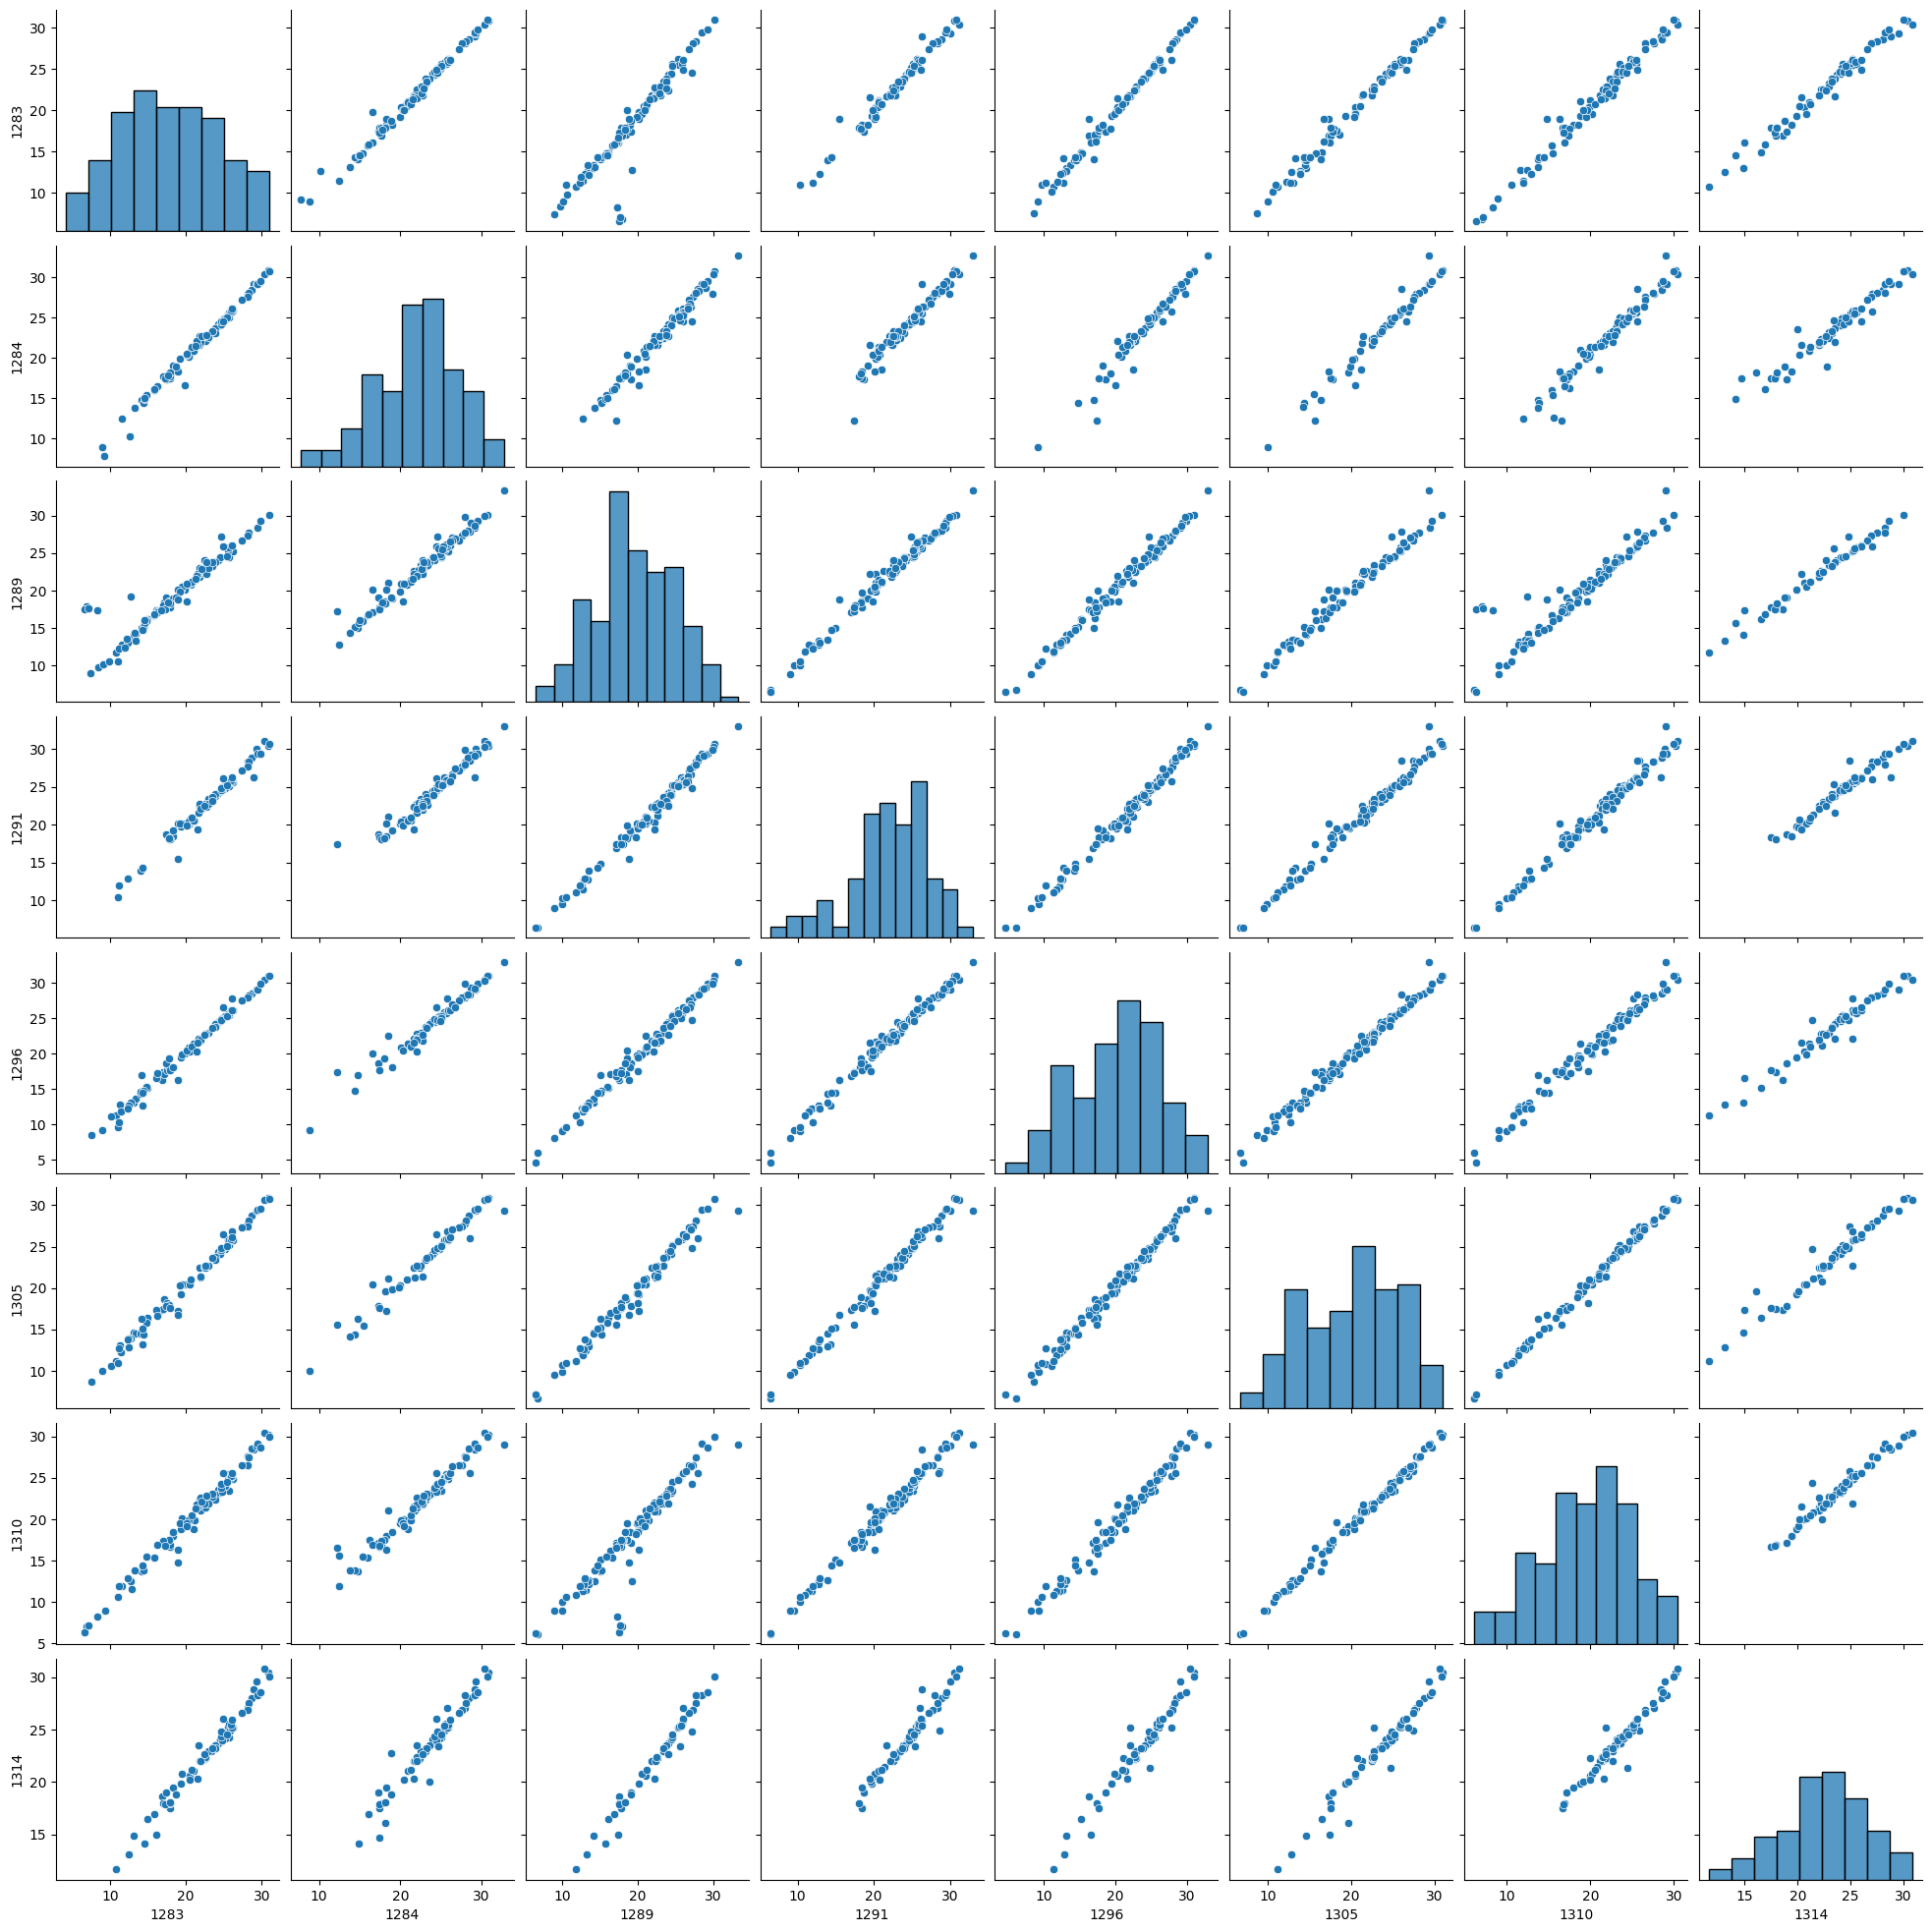

In [ ]:
estaciones = df_estacion[[1283,1284,1289,1291,1296,1305,1310,1314]]

sns.pairplot(estaciones)

Podemos observar que en todas hay una clara relación lineal positiva.

Ahora, analizaremos la relación entre `1315 y 1316`

Utilizaremos la función `scatterplot`de la libreria `seaborn`

Text(0.5, 1.0, 'Relación entre la temperatura media de las estaciones 1315 y 1316')

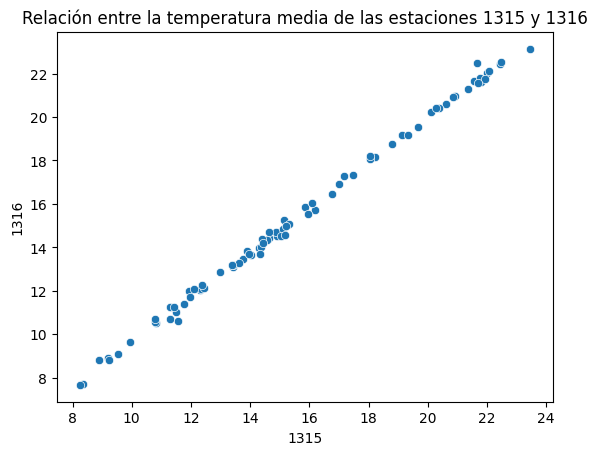

In [ ]:
sns.scatterplot(x = 1315,
                y = 1316, data = df_estacion).set_title("Relación entre la temperatura media de las estaciones 1315 y 1316")

Podemos notar que hay una clara relación lineal fuerte y positiva
.

Que pasa si comparamos estaciones que no tenian la temperatura muy correlacionada? tomaremos las estaciones `1284 y 1316 `

Text(0.5, 1.0, 'Relación entre la temperatura media de las estaciones 1284 y 1316')

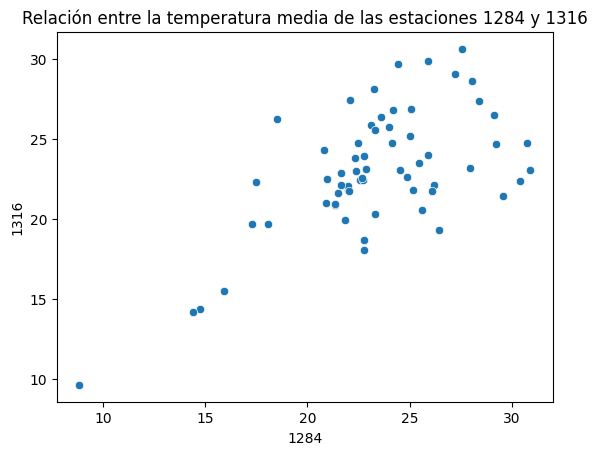

In [ ]:
sns.scatterplot(x = 1284,
                y = 1316, data = df_estacion).set_title("Relación entre la temperatura media de las estaciones 1284 y 1316")

Veremos que si bien hay una leve relación, no se compara para nada a la fuerte y concisa relación que hay entre las temperaturas de las estaciones vistas anteriormente.

A continuacion, analizaremos si hay relación entre las variables `TEMP_MEDIA`, `POR_HUM_MEDIA` y `VV_MEDIA`. Esto lo haremos en forma general y no lo haremos por estación como hicimos con `TEMP_MEDIA` anteriormente.

Analizaremos `TEMP_MEDIA` y `POR_HUM_MEDIA`

Text(0.5, 1.0, 'Relación entre la Temperatura media y el procentaje de humedad media')

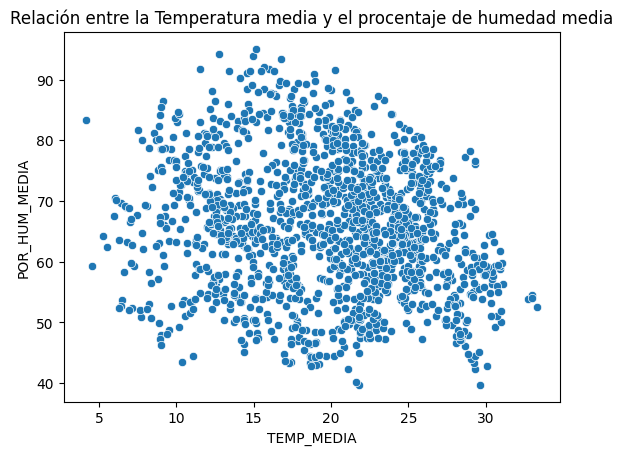

In [ ]:
sns.scatterplot(x = 'TEMP_MEDIA',
                y = 'POR_HUM_MEDIA', data = df).set_title("Relación entre la Temperatura media y el procentaje de humedad media")

Por lo que podemos notar, no se puede establecer una relación lineal entre `TEMP_MEDIA` y `POR_HUM_MEDIA`

Ahora analizaremos `TEMP_MEDIA` y `VV(M/S)`

Text(0.5, 1.0, 'Relación entre la temperatura media y la velocidad media del viento')

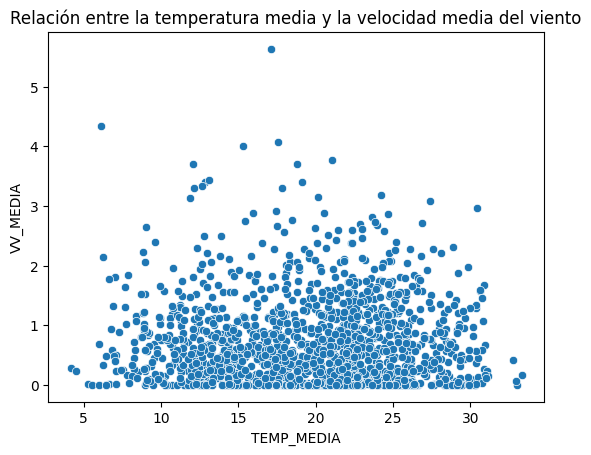

In [ ]:
sns.scatterplot(x = 'TEMP_MEDIA',
                y = 'VV_MEDIA', data = df).set_title("Relación entre la temperatura media y la velocidad media del viento")

Por lo que podemos notar, no se puede establecer una relación lineal entre  `TEMP_MEDIA` y `VV(M/S)`

Por ultimo, analizaremos `POR_HUM_MEDIA` Y `VV_MEDIA`

Text(0.5, 1.0, 'Relación entre el porcentaje de humedad media y la velocidad media del viento')

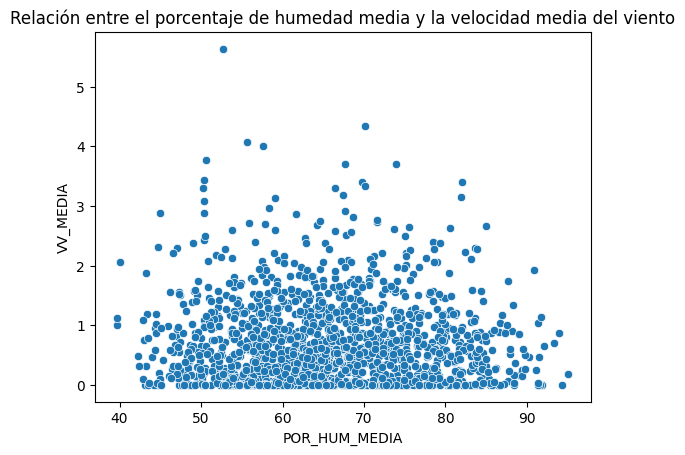

In [ ]:
sns.scatterplot(x = 'POR_HUM_MEDIA',
                y = 'VV_MEDIA', data = df).set_title("Relación entre el porcentaje de humedad media y la velocidad media del viento")

Por lo que podemos notar, no se puede establecer una relación lineal entre  `POR_HUM_MEDIA` Y `VV_MEDIA`.

# Conclusiones hasta el momento:

*   Las estaciones que brindan temperaturas similares son:
  *   `1283-1284-1289-1291-1296-1305-1310-1314`
  *   `1315 y 1316`

*   No hay relación entre `TEMP_MEDIA` y `POR_HUM_MEDIA`
*   No hay relación entre  `TEMP_MEDIA` y `VV(M/S)`
*   No hay relación entre `POR_HUM_MEDIA` Y `VV_MEDIA`







Lo que haremos a continuación, será mediante el dataset `torres-de-monitoreo-inteligente-tmi` graficar la ubicación de las torres de monitoreo de las estaciones para ver la distancia que hay entre las mismas.

Cargamos el csv: `torres-de-monitoreo-inteligente-tmi.csv`

Para cargarlo le especificamos a la función `read_csv` de la libreria Pandas el siguiente argumento:

*   Nombre del archivo a leer = `torres-de-monitoreo-inteligente-tmi.csv`
*   Delimiter = ;

In [ ]:
df_ubi = pd.read_csv('torres-de-monitoreo-inteligente-tmi.csv', delimiter=';')

In [ ]:
df_ubi

,TMI,BARRIO,DIRECCION,CALLE,ALTURA,BARRIO.1,COMUNA,CODIGO_POSTAL,CODIGO_POSTAL_ARG,LAT,LONG
0,1286,NUEVA POMPEYA,QUILMES 436,QUILMES,436,NUEVA POMPEYA,COMUNA 4,1437,C1437DLJ,"-34,64461058362050","-58,4173158880493000"
1,1318,SAN NICOLAS,VIAMONTE 808,VIAMONTE,808,SAN NICOLAS,COMUNA 1,1053,C1053ABR,"-34,60011427792480","-58,3783858841538000"
2,1314,RECOLETA,AV. SANTA FE 1748,SANTA FE AV.,1748,RECOLETA,COMUNA 2,1060,C1060ABQ,"-34,59592785220560","-58,3925838417798000"
3,1291,PARQUE PATRICIOS,AV. CASEROS 2526,CASEROS AV.,2526,PARQUE PATRICIOS,COMUNA 4,1264,C1264AAS,"-34,63577337416140","-58,3977958221768000"
4,1304,BALVANERA,CORRIENTES 2937,CORRIENTES AV.,2937,BALVANERA,COMUNA 3,1193,C1193AAB,"-34,60426315207610","-58,4070874106169000"
5,1305,ALMAGRO,AV. RIVADAVIA 3883,RIVADAVIA AV.,3883,ALMAGRO,COMUNA 5,1204,C1204AAD,"-34,61131058379370","-58,4207761759195000"
6,1315,CABALLITO,AV. JOSE MARAA MORENO 121,"MORENO, JOSE MARIA AV.",121,CABALLITO,COMUNA 6,1424,C1424AAB,"-34,61972216553560","-58,4358404340970000"
7,1316,FLORES,AV. SAN PEDRITO 60,SAN PEDRITO AV.,60,FLORES,COMUNA 7,1406,C1406EXN,"-34,63149612912250","-58,4691693075662000"
8,1292,PARQUE AVELLANEDA,REMEDIOS 3761,REMEDIOS,3761,PARQUE AVELLANEDA,COMUNA 9,1407,C1407HJI,"-34,64139747820640","-58,4766553939507000"
9,1282,MATADEROS,AV. EVA PERON 5251,"PERON, EVA AV.",5251,MATADEROS,COMUNA 9,1439,C1439BSD,"-34,65983263421550","-58,4819912008332000"


Nos quedaremos con las columnas `TMI` ,  `LAT` y `LONG` que son las que nos interesan.

In [ ]:
df_ubi = df_ubi[['TMI','LAT'	,'LONG']]

Filtramos las estaciones con las que veniamos trabajando.

In [ ]:
estaciones = [1283,1284,1289,1291,1296,1305,1310,1314,1315,1316]

df_ubi =  df_ubi[df_ubi['TMI'].isin(estaciones)]

In [ ]:
df_ubi

,TMI,LAT,LONG
2,1314,"-34,59592785220560","-58,3925838417798000"
3,1291,"-34,63577337416140","-58,3977958221768000"
5,1305,"-34,61131058379370","-58,4207761759195000"
6,1315,"-34,61972216553560","-58,4358404340970000"
7,1316,"-34,63149612912250","-58,4691693075662000"
10,1284,"-34,62825592988550","-58,4896025528124000"
12,1289,"-34,56222678231790","-58,4570958567666000"
14,1296,"-34,60363767690610","-58,5080983815965000"
15,1283,"-34,63938065497630","-58,5212734084432000"


Una vez hecho esto, comenzaremos a explorar el los datos del DF.

Visualizamos los tipos de datos.

In [ ]:
df_ubi.dtypes

TMI      int64
LAT     object
LONG    object
dtype: object

Podemos notar que `LAT` y` LONG` estan en tipo de dato `object`. Lo que haremos sera reemplazar la , por el . y luego los pasaremos a `float`

In [ ]:
df_ubi['LAT'] = df_ubi['LAT'].str.replace(',', '.')
df_ubi['LONG'] = df_ubi['LONG'].str.replace(',', '.')

df_ubi['LAT'] = df_ubi['LAT'].astype(float)
df_ubi['LONG'] = df_ubi['LONG'].astype(float)

Crearemos un mapa con la ubicación de las torres de monitoreo de las estaciones.

Utilizaremos la libreria `folium`

In [ ]:
# Crear un objeto de mapa centrado en la ubicación promedio de los puntos
center_lat = df_ubi['LAT'].mean()
center_lon = df_ubi['LONG'].mean()
mapa = folium.Map(location=[center_lat, center_lon], zoom_start=12.4)

# Agregar marcadores al mapa con etiquetas personalizadas
for _, row in df_ubi.iterrows():
    icon_html = f"<div class='my-label'>{row['TMI']}</div>"
    icon = folium.DivIcon(html=icon_html, icon_size=(30, 30))
    folium.Marker(
        location=[row['LAT'], row['LONG']],
        icon=folium.Icon(icon='cloud'),
        tooltip=row['TMI']
    ).add_to(mapa)
    folium.Marker(
        location=[row['LAT'], row['LONG']],
        icon=icon
    ).add_to(mapa)

mapa.get_root().html.add_child(folium.Element('<style>.my-label{font-size: 16px; text-align: center;}</style>'))


In [ ]:
mapa

Nosotros anteriormente habiamos notado que las estaciones `1283-1284-1291-1296-1305-1310-1314` eran las estaciones que tenian temperaturas similares entre ellas y diferian con las estaciones
`1315 y 1316` que asi mismo sus temperaturas también eran muy similares. Nosotros pensabamos que las estaciones que tenian temperaturas mas similares eran las que estaban mas cerca, pero viendo el gráfico podemos notar que no es asi.


Uno de los motivos por los que podria suceder esto es que las estaciones `1315 y 1316` se encuentran en el `CENTRO` de Buenos Aires y sus temperaturas son muy similares, mientras que el resto de estaciones se encuentran en los `ALREDEDORES` del centro de Buenos Aires y no importa la distancia que haya entre las mismas sus temperaturas son muy similares.

Las temperaturas distintas en el centro de Buenos Aires pueden deberse a diversos factores. Uno de los factores que contribuye a temperaturas más altas en el centro es la presencia de un mayor conglomerado de personas y actividades humanas. El centro de la ciudad suele ser el área más densamente poblada y con una mayor actividad comercial, industrial y de servicios. Esto genera una acumulación de calor producido por la actividad humana, como la generación de calor por edificios, vehículos, fuentes de energía y el tráfico en general.

Otros factores pueden incluir la falta de vegetación y áreas verdes en el centro, que desempeñan un papel importante en la regulación de las temperaturas al proporcionar sombra y enfriamiento a través de la evaporación de la humedad.

Otros motivos podrian ser el tipo de torre, cual es su ubicación local, entre otros.

Lo que haremos a continuacion será comparar los distintos valores que nos brinda la regresión lineal (**Error medio cuadrado(MSE), Error absoluto medio(MAE), R cuadrado y residuos**)  , para los siguientes pares de variables:

*   Temperatura media (`TEMP_MEDIA`) de las estaciones `1315` y `1316`
*   Temperatura media (`TEMP_MEDIA`) de las estaciones `1284` y `1316`
*   Porcentaje humedad media (`POR_HUM_MEDIA`) y velocidad del viento media (`VV_MEDIA`)










En primer lugar, cambiaremos los nombres de las estaciones a `string (object)` ya que al querer hacer el modelo de regresión nos arroja un error al querer hacerlo con `enteros (int)`.

In [ ]:
df_estacion = df_estacion.reset_index()
df_estacion.rename(columns={1283 : 'E1283' ,1284 : 'E1284',1289 : 'E1289',1291 : 'E1291',1296 : 'E1296', 1305 : 'E1305',1310 : 'E1310',1314 : 'E1314' , 1315: 'E1315' ,1316: 'E1316' }, inplace=True)

In [ ]:
# Reemplazar los valores 'NaN' por np.nan en todo la DataFrame
df_estacion = df_estacion.replace('NaN', np.nan)

Modelo de regresión para las estaciones `1315`y `1316`

In [ ]:
model0 = smf.ols(formula='E1315 ~ E1316', data=df_estacion).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:                  E1315   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.247e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          4.62e-105
Time:                        17:53:05   Log-Likelihood:                 15.601
No. Observations:                  81   AIC:                            -27.20
Df Residuals:                      79   BIC:                            -22.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6997      0.085      8.188      0.0

A continuación, realizaremos los siguientes pasos para analizar las estaciones seleccionadas:

1.   Filtraremos el dataframe `df_estacion` para quedarnos únicamente con las estaciones que vamos a analizar.
2.   Eliminaremos las filas que contengan valores `NaN` en ambas estaciones seleccionadas.
3. Realizaremos este proceso para asegurar que las temperaturas de ambas estaciones coincidan en la misma fecha.

Seguiremos estos pasos en todos los modelos que realizaremos.



In [ ]:
comparacion0 = df_estacion[['FECHA','E1315' ,'E1316']].dropna()
x0 = comparacion0['E1315']
y0 = comparacion0['E1316']

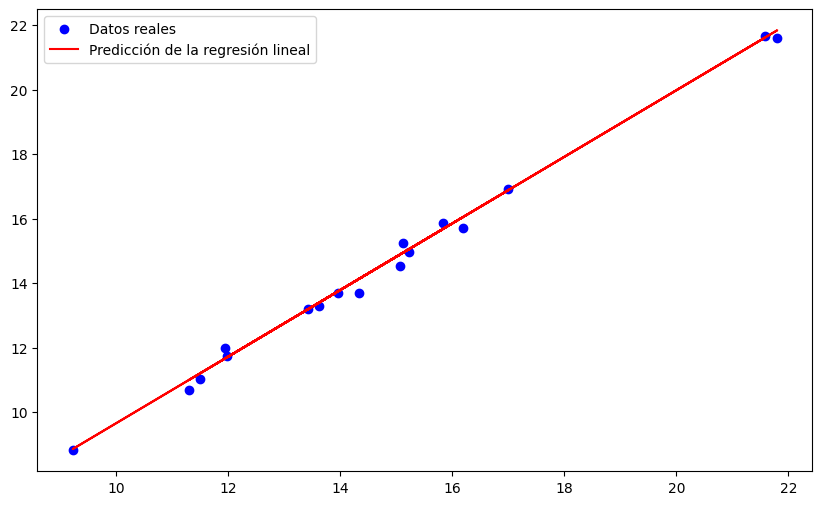

Mean Squared Error (MSE): 0.05030587569868314
Mean Absolute Error (MAE): 0.1796890225816694
Coeficiente de determinación (R cuadrado): 0.9954712536693177
Residuos:
[[-0.18664672]
 [-0.2392434 ]
 [-0.3052021 ]
 [-0.43641301]
 [-0.33867287]
 [-0.03820497]
 [-0.32922476]
 [ 0.02291306]
 [ 0.0680068 ]
 [ 0.28715908]
 [-0.10068555]
 [ 0.19025239]
 [ 0.33212392]
 [ 0.04889493]
 [-0.03986924]
 [ 0.00965721]
 [-0.08154339]]


In [ ]:
# Convierte un arreglo en una matriz columna usando NumPy y realiza una remodelación del arreglo en una matriz de una sola columna
x0 = np.array(x0).reshape(-1, 1)
y0 = np.array(y0).reshape(-1, 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train0, X_test0, y_train0, y_test0 = train_test_split(x0, y0, test_size=0.2, random_state=42)

# Crear una instancia de la clase LinearRegression
regressor0 = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
regressor0.fit(X_train0, y_train0)

# Realizar predicciones con los datos de prueba
y_pred0 = regressor0.predict(X_test0)

# Crear una gráfica
plt.figure(figsize=(10, 6))
# Agregar los datos de prueba a la gráfica como puntos
plt.scatter(X_test0, y_test0, color='blue', label='Datos reales')
# Agregar las predicciones del modelo a la gráfica como una línea
plt.plot(X_test0, y_pred0, color='red', label='Predicción de la regresión lineal')

# Agregar una leyenda
plt.legend()
# Mostrar la gráfica
plt.show()

# Calcular y imprimir el Mean Squared Error (MSE)
mse = mean_squared_error(y_test0, y_pred0)
print(f"Mean Squared Error (MSE): {mse}")

# Calcular y imprimir el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test0, y_pred0)
print(f"Mean Absolute Error (MAE): {mae}")

# Calcular el coeficiente de determinación (R cuadrado)
r2 = r2_score(y_test0, y_pred0)
print(f"Coeficiente de determinación (R cuadrado): {r2}")

# Calcular los residuos
residuos = y_test0 - y_pred0
print("Residuos:")
print(residuos)


**Evaluación de nuestro modelo:**

* `Error medio cuadrado(MSE)` : Indica que la media de la distancia absoluta entre los valores reales y estimados de la variable
dependiente es de aproximadamente 0.05030587569868314. Es decir, ya que el MSE es bajo la precisión del modelo es alta.
* `Error absoluto medio(MAE)` : Indica que la media de la distancia cuadrada entre los valores reales y estimados de la variable
dependiente es de aproximadamente 0.1796890225816694. Es decir, ya que el MAE es bajo la precisión del modelo es alta.
*  `R cuadrado`: Indica que, el modelo es capaz de explicar y predecir el aprox 99.55% de la variabilidad de los datos observados. Mientras mas alto sea el R cuadrado, mas preciso será el modelo.
*  `Residuos`: Podemos notar, que ningun residuo es mayor a 1 o -1. Esto es bueno, ya que el residuo indica el error entre la predicción del modelo y los datos reales, por lo que queremos que los residuos sean lo mas bajo posible.




Modelo re regresión para las estaciones `1284`y `1316`

In [ ]:
model1 = smf.ols(formula='E1284 ~ E1316', data=df_estacion).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  E1284   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     39.72
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           3.60e-08
Time:                        17:53:05   Log-Likelihood:                -161.45
No. Observations:                  63   AIC:                             326.9
Df Residuals:                      61   BIC:                             331.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9663      2.471      3.224      0.0

In [ ]:
comparacion1 = df_estacion[['FECHA','E1284' ,'E1316']].dropna()

x1 = comparacion1['E1284']
y1 = comparacion1['E1316']

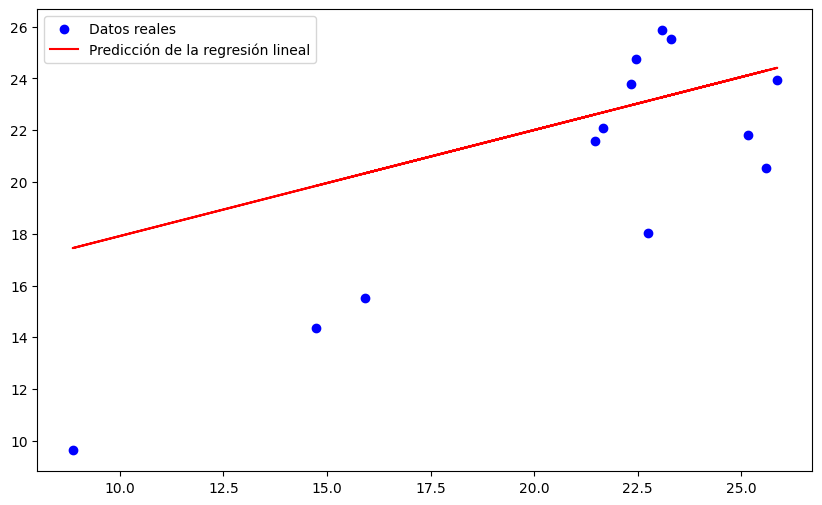

Mean Squared Error (MSE): 13.540869017121842
Mean Absolute Error (MAE): 2.9689546832644
Coeficiente de determinación (R cuadrado): 0.3860588558952921
Residuos:
[[-5.47575562]
 [-1.02641024]
 [-7.81165159]
 [-5.09108175]
 [ 0.80855518]
 [-2.28930371]
 [ 2.59053326]
 [-3.74350768]
 [ 1.74215027]
 [-4.81387311]
 [-0.58729853]
 [-0.45444347]
 [ 2.16184647]]


In [ ]:
# Convierte un arreglo en una matriz columna usando NumPy y realiza una remodelación del arreglo en una matriz de una sola columna
x1 = np.array(x1).reshape(-1, 1)
y1 = np.array(y1).reshape(-1, 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Crear una instancia de la clase LinearRegression
regressor1 = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
regressor1.fit(X_train1, y_train1)

# Realizar predicciones con los datos de prueba
y_pred1 = regressor1.predict(X_test1)

# Crear una gráfica
plt.figure(figsize=(10, 6))
# Agregar los datos de prueba a la gráfica como puntos
plt.scatter(X_test1, y_test1, color='blue', label='Datos reales')
# Agregar las predicciones del modelo a la gráfica como una línea
plt.plot(X_test1, y_pred1, color='red', label='Predicción de la regresión lineal')


# Agregar una leyenda
plt.legend()
# Mostrar la gráfica
plt.show()

# Calcular y imprimir el Mean Squared Error (MSE)
mse = mean_squared_error(y_test1, y_pred1)
print(f"Mean Squared Error (MSE): {mse}")

# Calcular y imprimir el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test1, y_pred1)
print(f"Mean Absolute Error (MAE): {mae}")

# Calcular el coeficiente de determinación (R cuadrado)
r2 = r2_score(y_test1, y_pred1)
print(f"Coeficiente de determinación (R cuadrado): {r2}")

# Calcular los residuos
residuos = y_test1 - y_pred1
print("Residuos:")
print(residuos)


**Evaluación de nuestro modelo:**

* `Error medio cuadrado(MSE)` : Indica que la media de la distancia cuadrada entre los valores reales y estimados de la variable
dependiente es de aproximadamente 13.540869017121842. Es decir, ya que el MSE es alto la precisión del modelo es baja.
* `Error absoluto medio(MAE)` : Indica que la media de la distancia absoluta entre los valores reales y estimados de la variable
dependiente es de aproximadamente 2.9689546832644. Es decir, ya que el MAE es alto la precisión del modelo es baja.
*  `R cuadrado`: Indica que, el modelo es capaz de explicar y predecir el aprox 38.60% de la variabilidad de los datos observados. Mientras mas alto sea el R cuadrado, mas preciso será el modelo. En este caso, el R cuadrado no es muy alto, por lo que podemos afirmar que el modelo no es muy preciso.
*  `Residuos`: Podemos notar, que los residuos aumentaron notoriamente a comparación de la relación anterior, al aumentar los residuios, aumentó el MSE y el MAE y disminuyó el R cuadrado.

Modelo re regresión para las variables `POR_HUM_MEDIA` y `VV_MEDIA`

In [ ]:
model2 = smf.ols(formula='POR_HUM_MEDIA ~ VV_MEDIA', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  E1284   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     39.72
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           3.60e-08
Time:                        17:53:05   Log-Likelihood:                -161.45
No. Observations:                  63   AIC:                             326.9
Df Residuals:                      61   BIC:                             331.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9663      2.471      3.224      0.0

In [ ]:
comparacion2 = df[['FECHA','POR_HUM_MEDIA' ,'VV_MEDIA']].dropna()

x2 = comparacion2['POR_HUM_MEDIA']
y2 = comparacion2['VV_MEDIA']

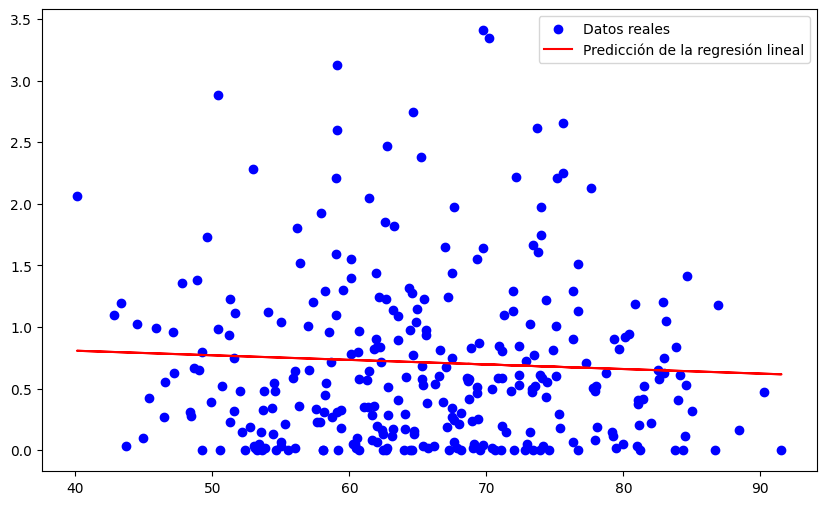

Mean Squared Error (MSE): 0.45973115340935305
Mean Absolute Error (MAE): 0.5250100836396175
Coeficiente de determinación (R cuadrado): -0.0013916523417387694
Residuos:
[[ 0.84073615]
 [-0.71676156]
 [-0.50914563]
 [-0.68967394]
 [ 0.26639734]
 [ 0.37131519]
 [-0.68615445]
 [-0.7619759 ]
 [ 0.35861545]
 [ 0.41822494]
 [ 0.32194539]
 [-0.4320243 ]
 [-0.42812211]
 [-0.17400023]
 [-0.10268039]
 [-0.0192318 ]
 [-0.18233101]
 [ 0.13263354]
 [ 0.73586053]
 [ 0.56880564]
 [-0.27044147]
 [-0.69837873]
 [ 0.09398288]
 [-0.24162376]
 [-0.27770289]
 [ 1.6650047 ]
 [-0.12881428]
 [-0.45935385]
 [ 0.94421636]
 [-0.69265344]
 [-0.36435046]
 [-0.5344776 ]
 [ 0.18102715]
 [-0.15201644]
 [ 0.16437726]
 [-0.73095804]
 [ 1.86293686]
 [ 0.4305882 ]
 [ 0.36520167]
 [-0.51728198]
 [-0.01923732]
 [ 0.71111376]
 [-0.59119606]
 [-0.0825645 ]
 [-0.16341927]
 [-0.7188941 ]
 [-0.36297183]
 [-0.64313739]
 [ 0.57918155]
 [-0.25119499]
 [-0.62090569]
 [-0.7237557 ]
 [ 0.1581315 ]
 [-0.15031082]
 [ 0.32945476]
 [ 0.25

In [ ]:
# Convierte un arreglo en una matriz columna usando NumPy y realiza una remodelación del arreglo en una matriz de una sola columna
x2 = np.array(x2).reshape(-1, 1)
y2 = np.array(y2).reshape(-1, 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Crear una instancia de la clase LinearRegression
regressor2 = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
regressor2.fit(X_train2, y_train2)

# Realizar predicciones con los datos de prueba
y_pred2 = regressor2.predict(X_test2)

# Crear una gráfica
plt.figure(figsize=(10, 6))
# Agregar los datos de prueba a la gráfica como puntos
plt.scatter(X_test2, y_test2, color='blue', label='Datos reales')
# Agregar las predicciones del modelo a la gráfica como una línea
plt.plot(X_test2, y_pred2, color='red', label='Predicción de la regresión lineal')

# Agregar una leyenda
plt.legend()
# Mostrar la gráfica
plt.show()

# Calcular y imprimir el Mean Squared Error (MSE)
mse = mean_squared_error(y_test2, y_pred2)
print(f"Mean Squared Error (MSE): {mse}")

# Calcular y imprimir el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test2, y_pred2)
print(f"Mean Absolute Error (MAE): {mae}")

# Calcular el coeficiente de determinación (R cuadrado)
r2 = r2_score(y_test2, y_pred2)
print(f"Coeficiente de determinación (R cuadrado): {r2}")

# Calcular los residuos
residuos = y_test2 - y_pred2
print("Residuos:")
print(residuos)

**Evaluación de nuestro modelo:**

* `Error medio cuadrado(MSE)` : Indica que la media de la distancia cuadrada entre los valores reales y estimados de la variable
dependiente es de aproximadamente 0.45973115340935305.
* `Error absoluto medio(MAE)` : Indica que la media de la distancia absoluta entre los valores reales y estimados de la variable
dependiente es de aproximadamente 0.5250100836396175..
*  `R cuadrado`: Indica que, el modelo es capaz de explicar y predecir el aprox 0.13% de la variabilidad de los datos observados. Un R cuadrado más alto indica un mejor ajuste del modelo, pero en este caso, el R cuadrado es bajo, lo que sugiere que el modelo no es preciso en la explicación de la variabilidad de los datos.
*  `Residuos`: Podemos notar que hay una gran variabilidad en los residuos. Hay algunos que son muy grandes y otros que son muy pequeños.

Por ultimo, lo que haremos será ver cual es la estación que cuenta con menos registros y a través del análisis realizado y de la regresión lineal, podremos definir cual es la mejor estación para que la misma pueda realizar la predicción de su temperatura faltante.

In [ ]:
 df_estacion.count()

index    378
FECHA    378
E1283    159
E1284    142
E1289    182
E1291    150
E1296    148
E1305    151
E1310    178
E1314     91
E1315    154
E1316    144
dtype: int64

La misma es la estación `1314` con `91 registros`.


Como vimos anteriormente las estaciones con las que mejor se relacionaba era con las siguientes:  `1283-1284-1289-1291-1296-1305-1310`

Lo que haremos será aplicar la función `ols` de la libreria `statsmodels.formula.api` para ver el modelo de regresión lineal. Asi podremos comparar los distintos valores arrojados por los distintos modelos, y seleccionar la estacion mas adecuada para realizar la predicción.


In [ ]:
model3 = smf.ols(formula='E1314 ~ E1283', data=df_estacion).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  E1314   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     2797.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           3.76e-55
Time:                        17:53:06   Log-Likelihood:                -65.349
No. Observations:                  67   AIC:                             134.7
Df Residuals:                      65   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3078      0.393      5.868      0.0

In [ ]:
model4 = smf.ols(formula='E1314 ~ E1284', data=df_estacion).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  E1314   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     899.9
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           5.15e-39
Time:                        17:53:06   Log-Likelihood:                -89.559
No. Observations:                  65   AIC:                             183.1
Df Residuals:                      63   BIC:                             187.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9567      0.761      1.257      0.2

In [ ]:
model5 = smf.ols(formula='E1314 ~ E1289', data=df_estacion).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  E1314   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1589.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           2.54e-37
Time:                        17:53:06   Log-Likelihood:                -53.133
No. Observations:                  48   AIC:                             110.3
Df Residuals:                      46   BIC:                             114.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1533      0.559      0.274      0.7

In [ ]:
model6 = smf.ols(formula='E1314 ~ E1291', data=df_estacion).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  E1314   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     955.0
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           2.26e-39
Time:                        17:53:06   Log-Likelihood:                -71.715
No. Observations:                  64   AIC:                             147.4
Df Residuals:                      62   BIC:                             151.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1454      0.717      2.994      0.0

In [ ]:
model7 = smf.ols(formula='E1314 ~ E1296', data=df_estacion).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                  E1314   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1067.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           1.06e-37
Time:                        17:53:06   Log-Likelihood:                -75.271
No. Observations:                  57   AIC:                             154.5
Df Residuals:                      55   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4544      0.645      3.805      0.0

In [ ]:
model8 = smf.ols(formula='E1314 ~ E1305', data=df_estacion).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                  E1314   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1029.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           2.74e-37
Time:                        17:53:06   Log-Likelihood:                -77.672
No. Observations:                  57   AIC:                             159.3
Df Residuals:                      55   BIC:                             163.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3474      0.690      1.953      0.0

In [ ]:
model9 = smf.ols(formula='E1314 ~ E1310', data=df_estacion).fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:                  E1314   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1018.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           2.42e-39
Time:                        17:53:06   Log-Likelihood:                -68.209
No. Observations:                  62   AIC:                             140.4
Df Residuals:                      60   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1365      0.657      4.777      0.0

Basándome en los resultados obtenidos, se encontró una estación que parece muy prometedora para realizar la predicción:

*   La estación `1283` muestra un R-cuadrado (R-squared) más alto, alcanzando un valor de `0.977`, con un número de grados de libertad residuales (Df Residuals) de `67`.





**A entrenar y graficar nuestro modelo!**

In [ ]:
#Seleccionamos los registros que no tengan valores NaN.
comparacion3 = df_estacion[['FECHA','E1314' ,'E1283']].dropna()

x3 = comparacion3['E1283']
y3 = comparacion3['E1314']

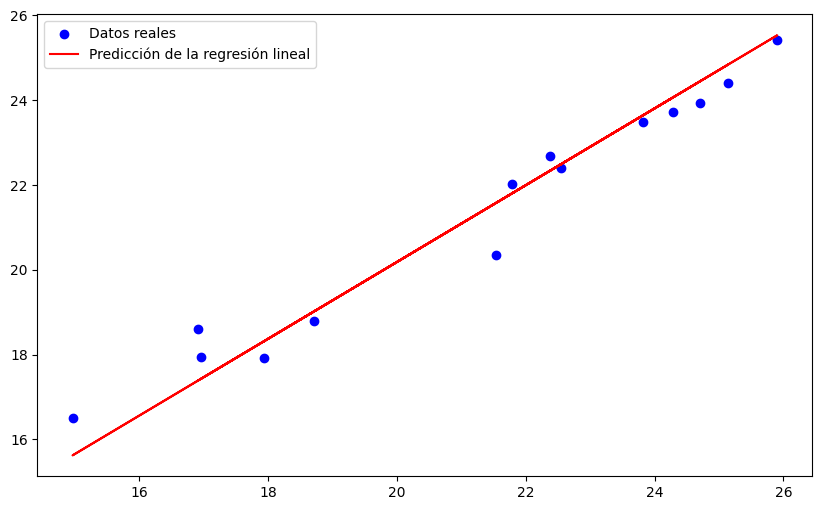

Mean Squared Error (MSE): 0.35535974093233247
Mean Absolute Error (MAE): 0.4748962417760844
Coeficiente de determinación (R cuadrado): 0.9539603696408735
Residuos:
[[-0.52022559]
 [-0.15463815]
 [ 0.87433681]
 [ 0.22082423]
 [-0.09443432]
 [-0.10377057]
 [-1.22178459]
 [ 0.52411493]
 [-0.21476015]
 [-0.3432132 ]
 [-0.38778684]
 [ 0.3519684 ]
 [-0.42939346]
 [ 1.20729614]]


In [ ]:
# Convierte un arreglo en una matriz columna usando NumPy y realiza una remodelación del arreglo en una matriz de una sola columna
x3 = np.array(x3).reshape(-1, 1)
y3 = np.array(y3).reshape(-1, 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Crear una instancia de la clase LinearRegression
regressor3 = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
regressor3.fit(X_train3, y_train3)

# Realizar predicciones con los datos de prueba
y_pred3 = regressor3.predict(X_test3)

# Crear una gráfica
plt.figure(figsize=(10, 6))
# Agregar los datos de prueba a la gráfica como puntos
plt.scatter(X_test3, y_test3, color='blue', label='Datos reales')
# Agregar las predicciones del modelo a la gráfica como una línea
plt.plot(X_test3, y_pred3, color='red', label='Predicción de la regresión lineal')


# Agregar una leyenda
plt.legend()
# Mostrar la gráfica
plt.show()

# Calcular y imprimir el Mean Squared Error (MSE)
mse = mean_squared_error(y_test3, y_pred3)
print(f"Mean Squared Error (MSE): {mse}")

# Calcular y imprimir el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test3, y_pred3)
print(f"Mean Absolute Error (MAE): {mae}")

# Calcular el coeficiente de determinación (R cuadrado)
r2 = r2_score(y_test3, y_pred3)
print(f"Coeficiente de determinación (R cuadrado): {r2}")

# Calcular los residuos
residuos = y_test3 - y_pred3
print("Residuos:")
print(residuos)


**Evaluación de nuestro modelo:**

* `Error medio cuadrado(MSE)` : Indica que la media de la distancia cuadrada entre los valores reales y estimados de la variable dependiente es de aproximadamente 0.35535974093233247.
* `Error absoluto medio(MAE)` : Indica que la media de la distancia absoluta entre los valores reales y estimados de la variable
dependiente es de aproximadamente 0.4748962417760844.
*  `R cuadrado`: Indica que, el modelo es capaz de explicar y predecir el aprox 95.40% de la variabilidad de los datos observados. Mientras mas alto sea el R cuadrado, mas preciso será el modelo. En este caso, el R cuadrado es alto, por lo que el modelo será bastante preciso.
*  `Residuos`: Podemos notar que los residuos son muy pequeños.

**A poner a prueba nuestro modelo!**

En base a nuestro modelo realizado recientemente entre las estaciones `1314` y `1283` lo que haremos será predecir las temperaturas faltantes de la estación `1314`.

En primer lugar, lo que haremos será filtrar de `df_estacion` las estaciones que utilizaremos. Y luego, solo nos quedaremos con los registros en los que la estación `1314` tenga valores `Nan` y los de la estación `1283` tengan valores no nulos.

In [ ]:
estaciones = df_estacion[['FECHA', 'E1314', 'E1283']]
filtro = (estaciones['E1314'].isnull()) & (estaciones['E1283'].notnull())
estaciones = estaciones[filtro]

In [ ]:
estaciones

,FECHA,E1314,E1283
26,2011-05-07,NaN,17.079167
27,2011-05-08,NaN,14.816667
28,2011-05-09,NaN,13.329167
29,2011-05-10,NaN,17.516667
30,2011-05-11,NaN,19.775000
...,...,...,...
360,2012-06-22,NaN,13.175000
361,2012-06-23,NaN,13.870833
362,2012-06-24,NaN,13.329167
363,2012-06-25,NaN,9.270833


In [ ]:
estaciones.count()

FECHA    92
E1314     0
E1283    92
dtype: int64

Podemos ver que son `92 registros` que nuestro modelo predecidirá.

In [ ]:
#Seleccionamos las variables
x3 = estaciones['E1314']
y3 = estaciones['E1283']

In [ ]:
#Pasamos los datos que usaremos para predecir.
x_pred3 = np.array(y3).reshape(-1, 1)

In [ ]:
#Hacemos la predicción con nuestro modelo.
y_pred3 = regressor3.predict(x_pred3)

In [ ]:
#rellenamos las temperaturas de la estación.
estaciones['E1314'] = y_pred3

In [ ]:
estaciones.count()

FECHA    92
E1314    92
E1283    92
dtype: int64

In [ ]:
estaciones

,FECHA,E1314,E1283
26,2011-05-07,17.535333,17.079167
27,2011-05-08,15.486023,14.816667
28,2011-05-09,14.138687,13.329167
29,2011-05-10,17.931608,17.516667
30,2011-05-11,19.977143,19.775000
...,...,...,...
360,2012-06-22,13.999048,13.175000
361,2012-06-23,14.629314,13.870833
362,2012-06-24,14.138687,13.329167
363,2012-06-25,10.462763,9.270833


**Cumplimos nuestro objetivo!! logramos predecir las temperaturas faltantes de una estación 💪📈**